In [1]:
import os
os.getcwd()

'/workspace/Assignment-15'

In [2]:
!ls

Create Data.ipynb	data			newmodel.py  train.py
Depth Estimation.ipynb	data_producer.py	overlay.zip  transformation.py
Untitled.ipynb		data_producer_depth.py	runs	     validate.py
__pycache__		model.py		test.py      visualize.py


In [3]:
import torch
from torch.utils.tensorboard import SummaryWriter
torch.cuda.empty_cache()

In [4]:
from pathlib import Path

root_folder = Path.cwd()

In [5]:
import torch
cuda_check = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda_check else "cpu")

In [6]:
print(device)

cuda:0


In [7]:
print(root_folder)

/workspace/Assignment-15


In [8]:
from torchvision.transforms import transforms

transformFG = transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.49737222, 0.49328762, 0.46562814), (0.21714624, 0.21749634, 0.23051126)),
                                 
])

transformDepth = transforms.Compose([
                                transforms.ToTensor(),
])

In [9]:
from torch.utils.tensorboard import SummaryWriter

In [10]:
from torchvision.transforms import transforms
from pathlib import Path
data_folder = root_folder / 'data'
train_folder = data_folder / 'train'
# test_folder = data_folder / 'test1'
# validate_folder = data_folder / 'validate1'
weights_folder = data_folder / 'weights'


In [11]:
writer = SummaryWriter('runs')

In [12]:
import data_producer as dp
import data_producer_depth as ddp
import model as md
import train
import test
import validate
import visualize as viz
import newmodel as nm

In [13]:
train_set = ddp.DataProducer(train_folder, transformFG, transformDepth)

In [14]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_set, batch_size=256, shuffle= True, num_workers = 12)
# test_dl = DataLoader(test_set, batch_size=16, shuffle= True,num_workers = 6)
# validate_dl = DataLoader(validate_set, batch_size=16, shuffle= True, num_workers = 6)

In [15]:
model = nm.UNet()
model = model.to(device)

In [16]:
from torchsummary import summary
summary(model, input_size=(3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             864
       BatchNorm2d-2           [-1, 32, 64, 64]              64
              ReLU-3           [-1, 32, 64, 64]               0
            Conv2d-4           [-1, 32, 64, 64]           9,216
       BatchNorm2d-5           [-1, 32, 64, 64]              64
              ReLU-6           [-1, 32, 64, 64]               0
         MaxPool2d-7           [-1, 32, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          18,432
       BatchNorm2d-9           [-1, 64, 32, 32]             128
             ReLU-10           [-1, 64, 32, 32]               0
           Conv2d-11           [-1, 64, 32, 32]          36,864
      BatchNorm2d-12           [-1, 64, 32, 32]             128
             ReLU-13           [-1, 64, 32, 32]               0
        MaxPool2d-14           [-1, 64,

In [17]:
criterion = torch.nn.L1Loss()

In [18]:
optim = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=.9, weight_decay=1e-5)

Epoch -  1 -- Time Taken -  29.07353377342224
Epoch -  2 -- Time Taken -  29.28949236869812
Epoch -  3 -- Time Taken -  29.468497276306152
Epoch -  4 -- Time Taken -  29.823699235916138
Epoch -  5 -- Time Taken -  29.564870595932007
Epoch -  6 -- Time Taken -  29.52927827835083
Epoch -  7 -- Time Taken -  29.473395586013794
Epoch -  8 -- Time Taken -  29.362003803253174
Epoch -  9 -- Time Taken -  29.475087881088257
Epoch -  10 -- Time Taken -  29.357858180999756
Epoch -  11 -- Time Taken -  29.276915311813354
Epoch -  12 -- Time Taken -  29.46225357055664
Epoch -  13 -- Time Taken -  29.634423971176147
Epoch -  14 -- Time Taken -  29.561102390289307
Epoch -  15 -- Time Taken -  29.70411252975464
Epoch -  16 -- Time Taken -  29.439433813095093
Epoch -  17 -- Time Taken -  29.534369230270386
Epoch -  18 -- Time Taken -  29.44282603263855
Epoch -  19 -- Time Taken -  29.307106494903564
Epoch -  20 -- Time Taken -  29.397467613220215
Epoch -  21 -- Time Taken -  29.495156049728394
Epoch -

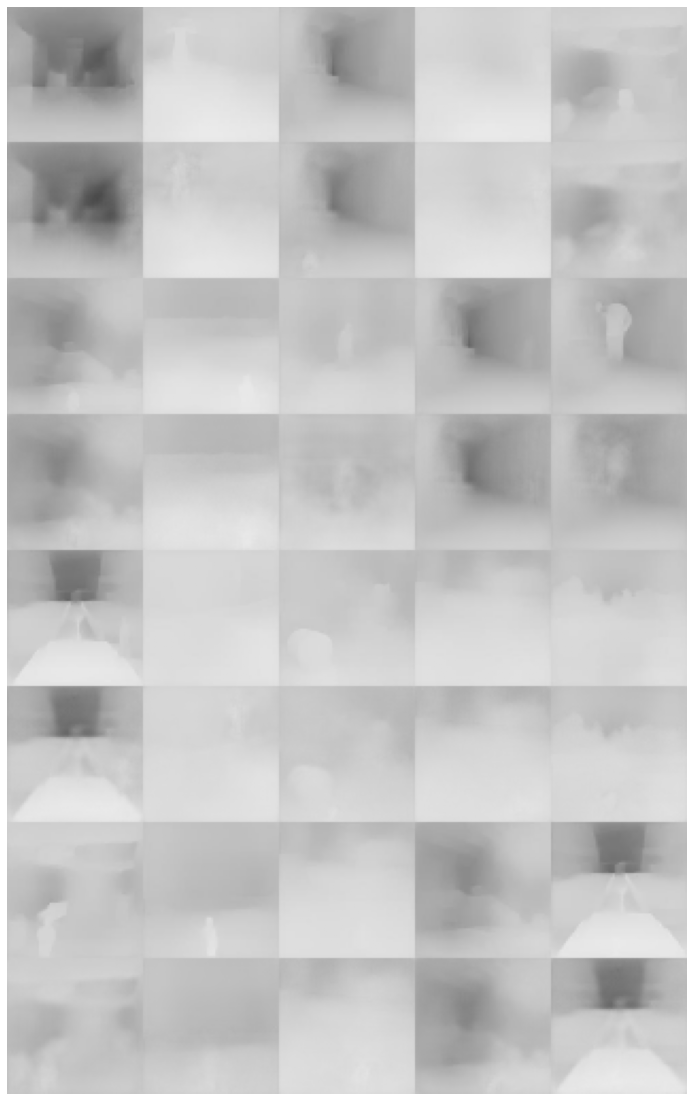

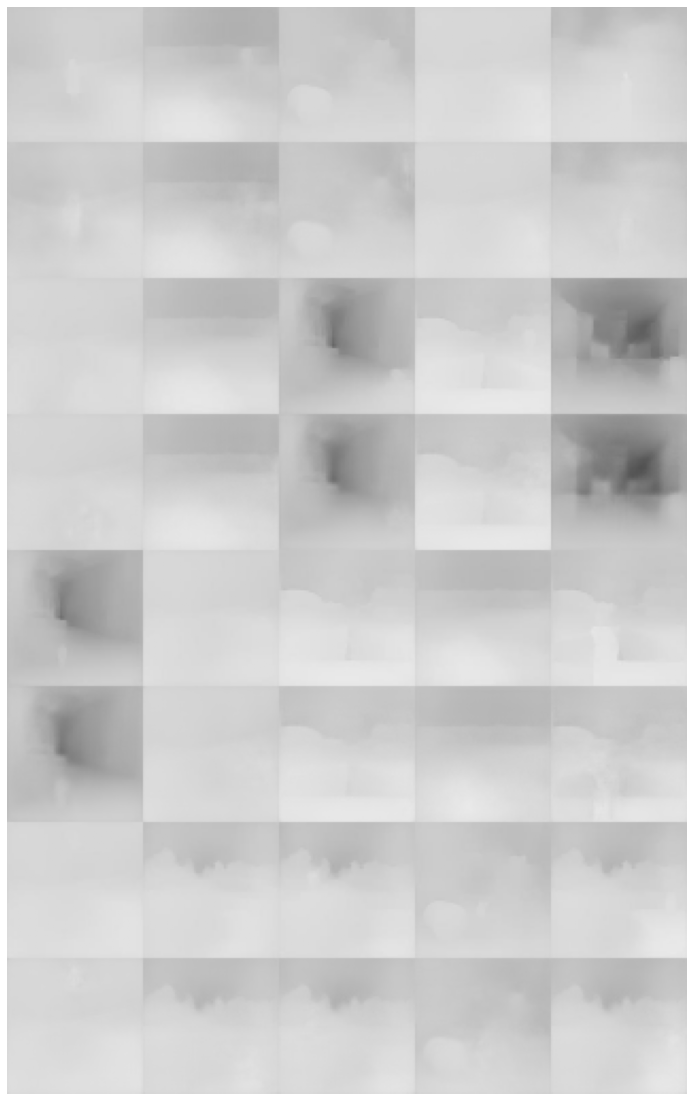

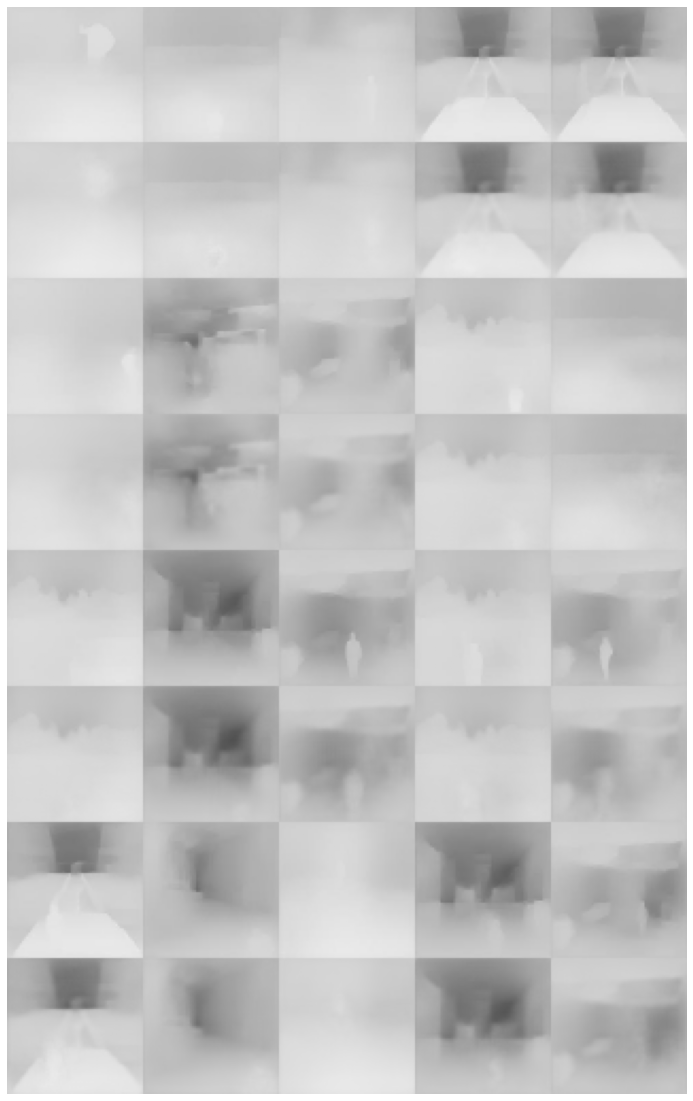

In [19]:
import time

for epoch in range(1,151):
  start = time.time()
  train.train(model, criterion, device, train_dl, optim, epoch, writer)
  end = time.time()
  print('Epoch - ', str(epoch), '-- Time Taken - ', str(end - start) )
  if epoch % 10 == 0:
    file_name = str(weights_folder) + '/epoch-' + str(epoch) + 'dweights.pth'
    torch.save(model.state_dict(), file_name)

In [ ]:
from torch.optim.lr_scheduler import StepLR

scheduler = StepLR(optim, step_size = 50, gamma=0.1, last_epoch=-1)

for epoch in range(151,301):
  start = time.time()
  train.train(model, criterion, device, train_dl, optim, epoch, writer)
  end = time.time()
  print('Epoch - ', str(epoch), '-- Time Taken - ', str(end - start) )
  # val_loss = validate(model, criterion, device, validate_dl)
  # print(val_loss)
  scheduler.step()
  if epoch % 10 == 0:
    file_name = str(weights_folder) + '/epoch-' + str(epoch) + 'dweights.pth'
    torch.save(model.state_dict(), file_name)

Epoch -  151 -- Time Taken -  295.1701512336731
Epoch -  152 -- Time Taken -  302.92207980155945
Epoch -  153 -- Time Taken -  306.90714144706726
Epoch -  154 -- Time Taken -  307.91154956817627
Epoch -  155 -- Time Taken -  312.0303084850311
Epoch -  156 -- Time Taken -  305.10796999931335
Epoch -  157 -- Time Taken -  309.6070234775543
Epoch -  158 -- Time Taken -  307.5186400413513
Epoch -  159 -- Time Taken -  307.8593051433563
Epoch -  160 -- Time Taken -  308.88494181632996
Epoch -  161 -- Time Taken -  310.1929874420166
Epoch -  162 -- Time Taken -  308.4619240760803
Epoch -  163 -- Time Taken -  306.96685814857483
Epoch -  164 -- Time Taken -  310.0784673690796
Epoch -  165 -- Time Taken -  312.2952551841736
Epoch -  166 -- Time Taken -  311.1253864765167
Epoch -  167 -- Time Taken -  311.0193705558777
Epoch -  168 -- Time Taken -  310.840008020401
Epoch -  169 -- Time Taken -  308.23449897766113
Epoch -  170 -- Time Taken -  307.2504816055298
Epoch -  171 -- Time Taken -  310.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  200 -- Time Taken -  276.3152754306793
Epoch -  201 -- Time Taken -  276.5088474750519
Epoch -  202 -- Time Taken -  277.4833540916443
Epoch -  203 -- Time Taken -  278.8405776023865
Epoch -  204 -- Time Taken -  277.6483271121979
Epoch -  205 -- Time Taken -  277.0986592769623
Epoch -  206 -- Time Taken -  277.66884303092957
Epoch -  207 -- Time Taken -  273.417857170105
Epoch -  208 -- Time Taken -  277.2730345726013
Epoch -  209 -- Time Taken -  277.4054129123688
Epoch -  210 -- Time Taken -  278.176518201828
Epoch -  211 -- Time Taken -  273.97728276252747
Epoch -  212 -- Time Taken -  275.0493121147156
Epoch -  213 -- Time Taken -  277.04108929634094
Epoch -  214 -- Time Taken -  276.3143308162689
Epoch -  215 -- Time Taken -  277.1387505531311
Epoch -  216 -- Time Taken -  276.4966320991516
Epoch -  217 -- Time Taken -  275.2681007385254
Epoch -  218 -- Time Taken -  275.4411127567291
Epoch -  219 -- Time Taken -  275.9790585041046
Epoch -  220 -- Time Taken -  275.45357

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  250 -- Time Taken -  276.25993752479553
Epoch -  251 -- Time Taken -  277.2659442424774
Epoch -  252 -- Time Taken -  276.93343710899353
Epoch -  253 -- Time Taken -  278.4845702648163
Epoch -  254 -- Time Taken -  277.96630358695984
Epoch -  255 -- Time Taken -  278.0740351676941
Epoch -  256 -- Time Taken -  276.89478969573975
Epoch -  257 -- Time Taken -  276.517071723938
Epoch -  258 -- Time Taken -  278.24831223487854
Epoch -  259 -- Time Taken -  279.23447251319885
Epoch -  260 -- Time Taken -  277.84295201301575
Epoch -  261 -- Time Taken -  277.8529043197632
Epoch -  262 -- Time Taken -  278.5558052062988
Epoch -  263 -- Time Taken -  276.3914670944214
Epoch -  264 -- Time Taken -  279.3474497795105
Epoch -  265 -- Time Taken -  279.670361995697
Epoch -  266 -- Time Taken -  277.1017916202545
Epoch -  267 -- Time Taken -  277.87564301490784
Epoch -  268 -- Time Taken -  277.69684171676636
Epoch -  269 -- Time Taken -  278.6910238265991
Epoch -  270 -- Time Taken -  277

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  300 -- Time Taken -  279.153915643692
